In [1]:
#Импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC ,SVR

C:\Users\Тарас\AppData\Local\Temp\ipykernel_13232\687477425.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Импортируем датасет
df=pd.read_csv("./winequality-red.csv")

In [3]:
#Просмотр первых записей
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Вывод количества записей, столбцов
print("Shape The DataSet ", df.shape )

Shape The DataSet  (1599, 12)


In [5]:
#Проверка типов колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Проверка  нулевых значений
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Описание набора значений
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Уникальные значения оценки вин
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [9]:
#Количество вин по оценкам
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

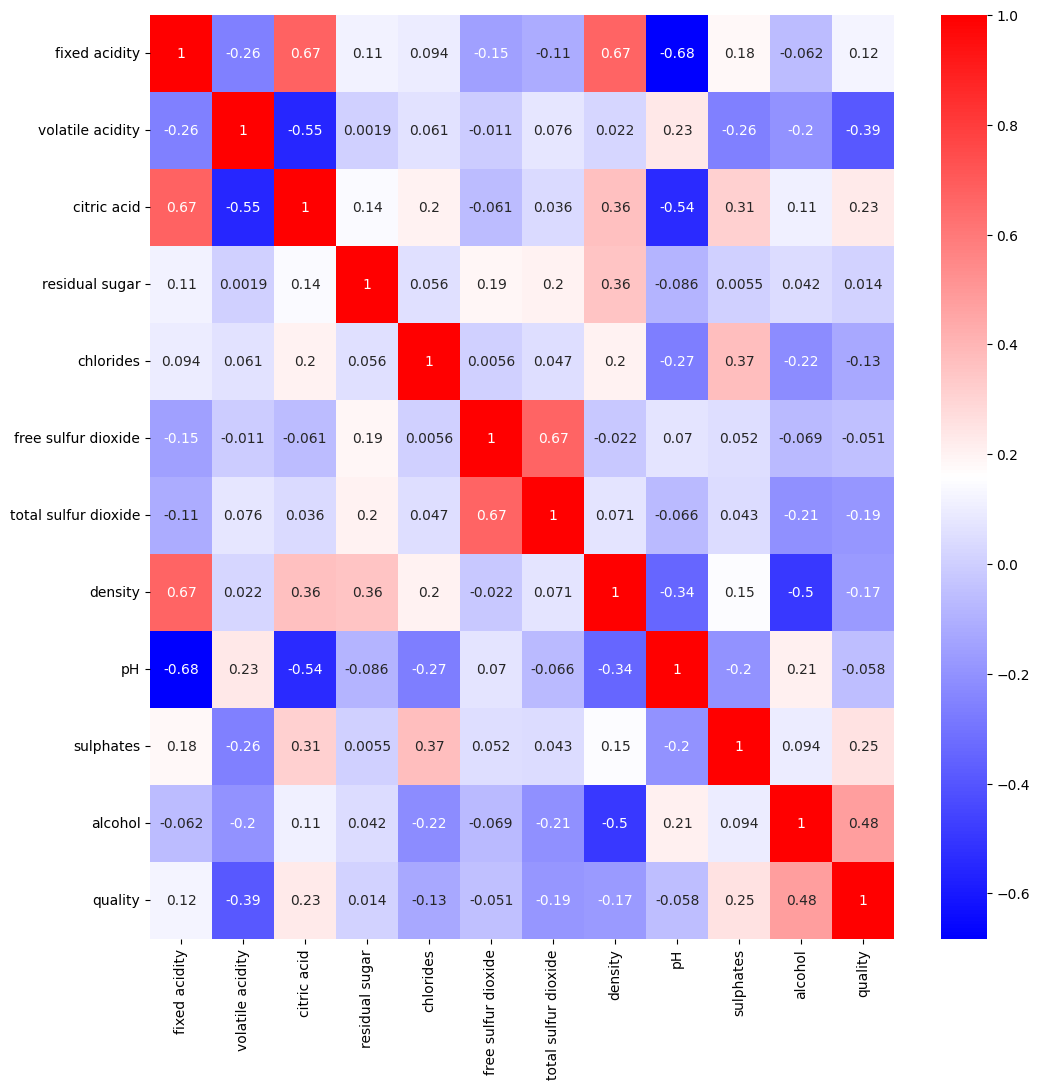

In [10]:
#Создание корреляционной матрицы (тепловой карты)
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bwr")
plt.show()

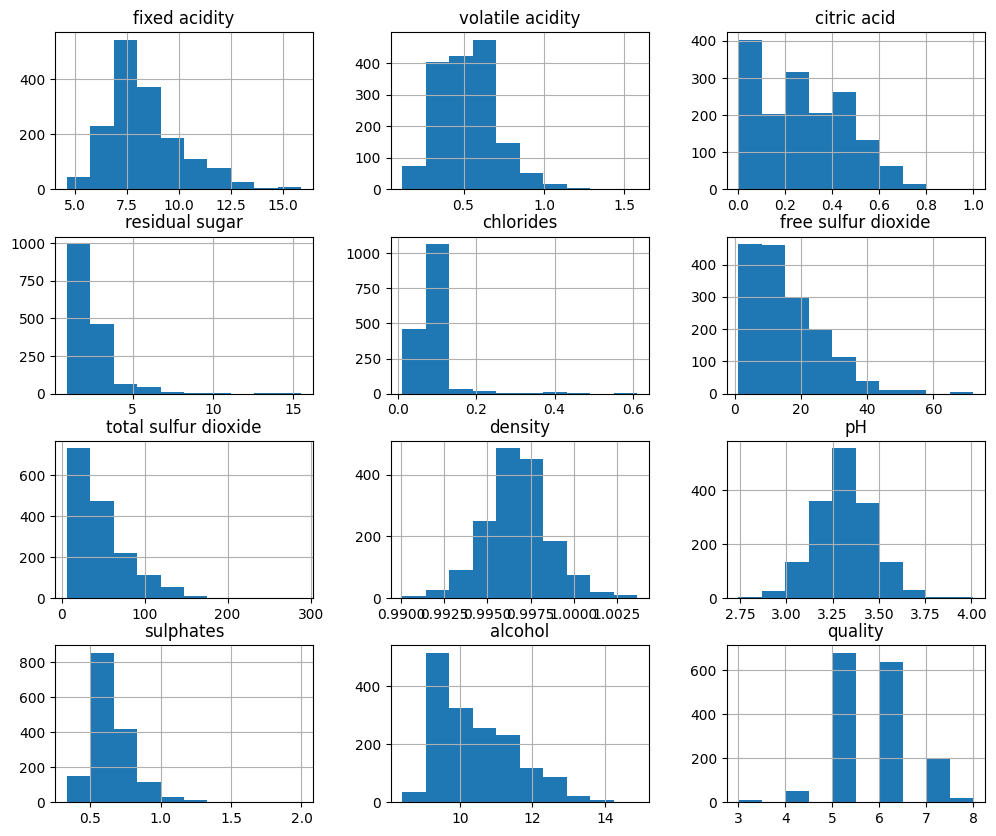

In [11]:
#Графики подсчета
df.hist(bins=10,figsize=(12,10))
plt.show()

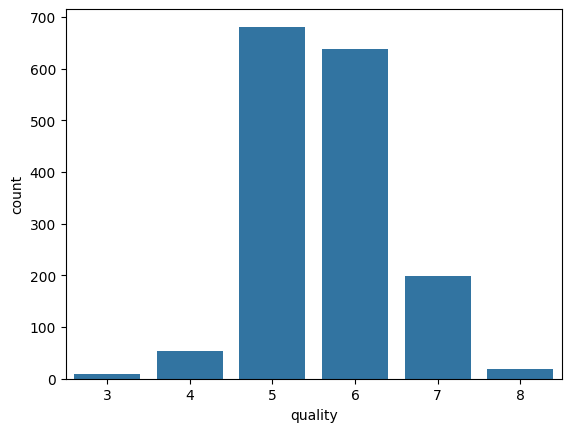

In [12]:
#Распределение атрибута качество
sns.countplot(x="quality",data=df)
plt.show()

<Axes: >

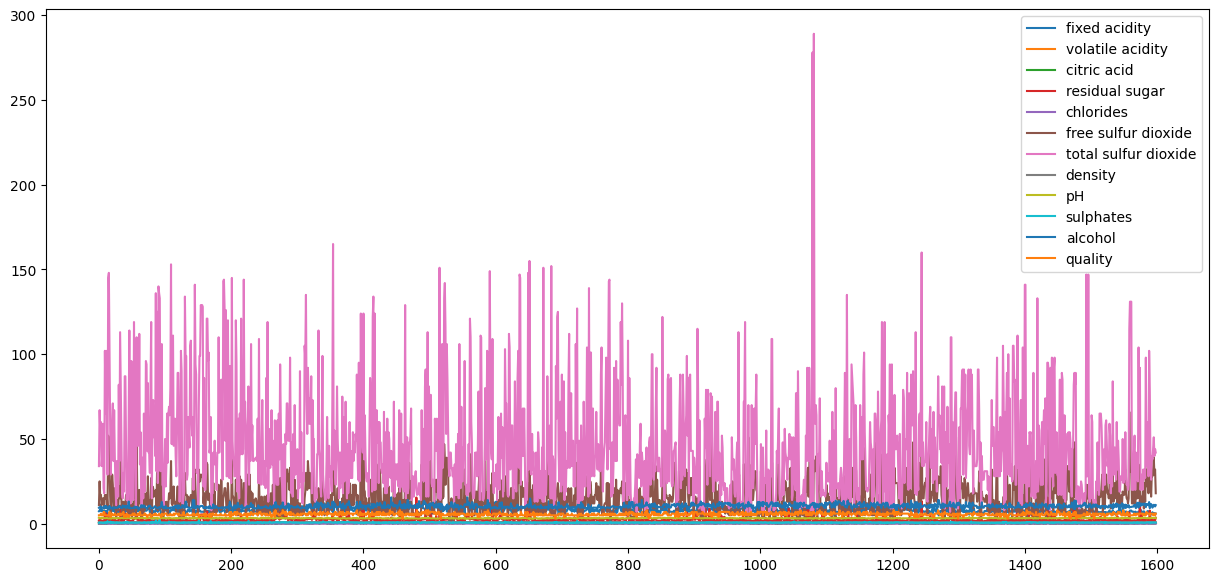

In [13]:
#График набора данных
df.plot(figsize=(15,7))

In [14]:
#Группировка по качеству
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

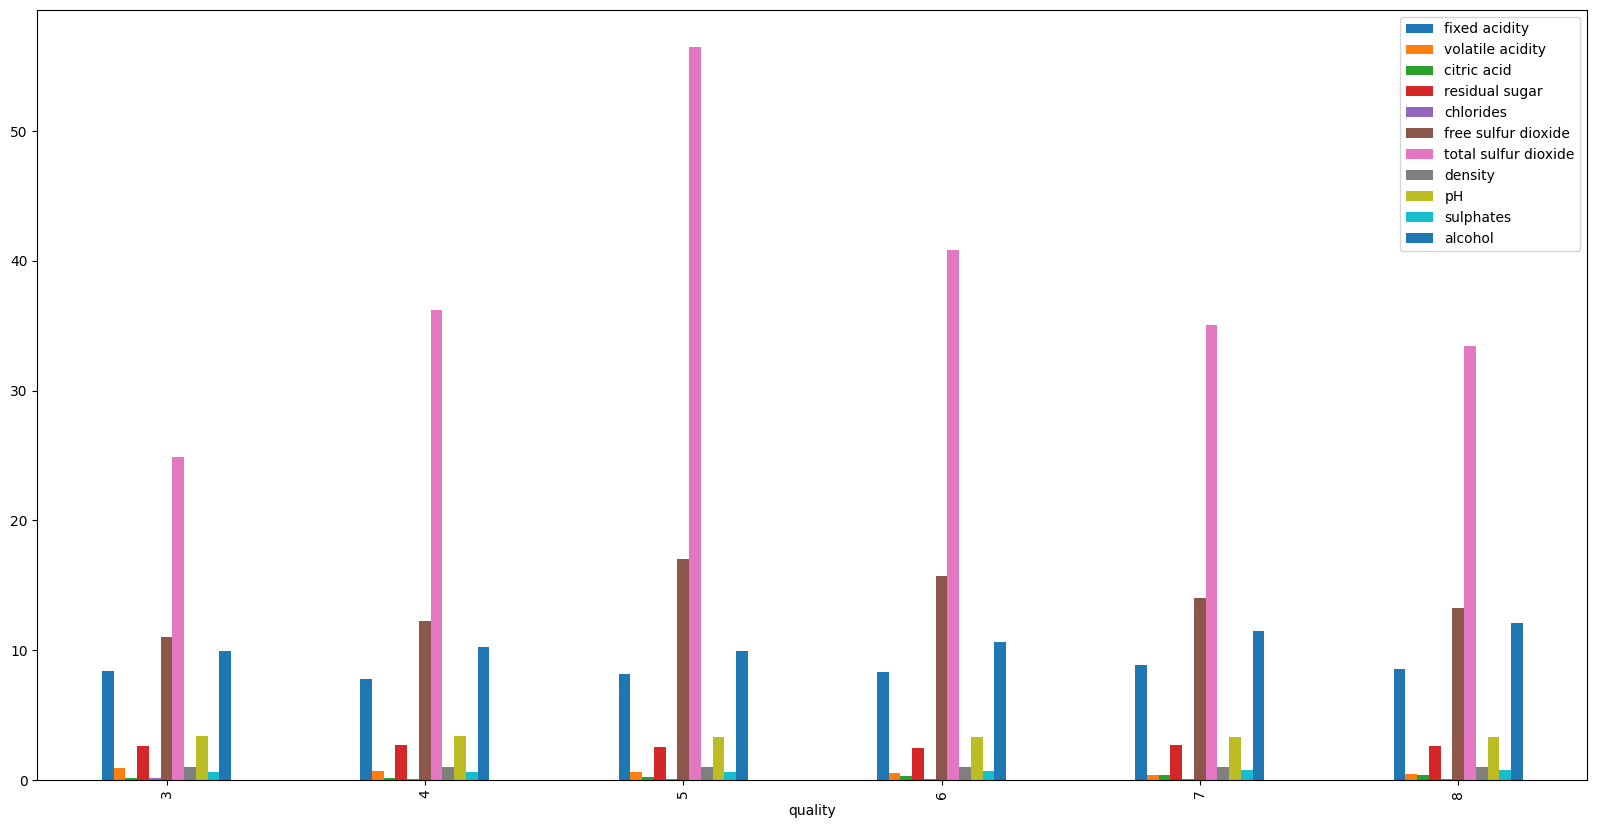

In [15]:
ave_qu.plot(kind="bar",figsize=(20,10))

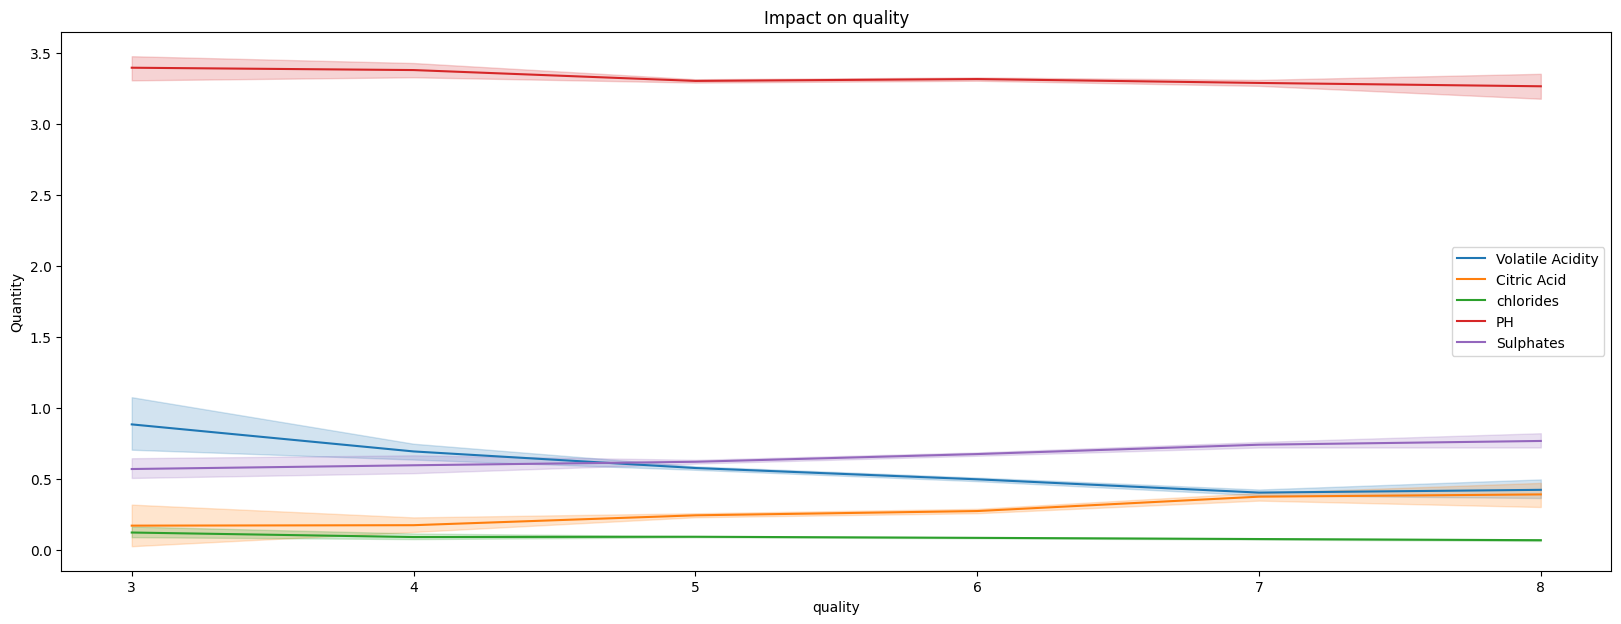

In [16]:
# Влияние элементов на качество
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

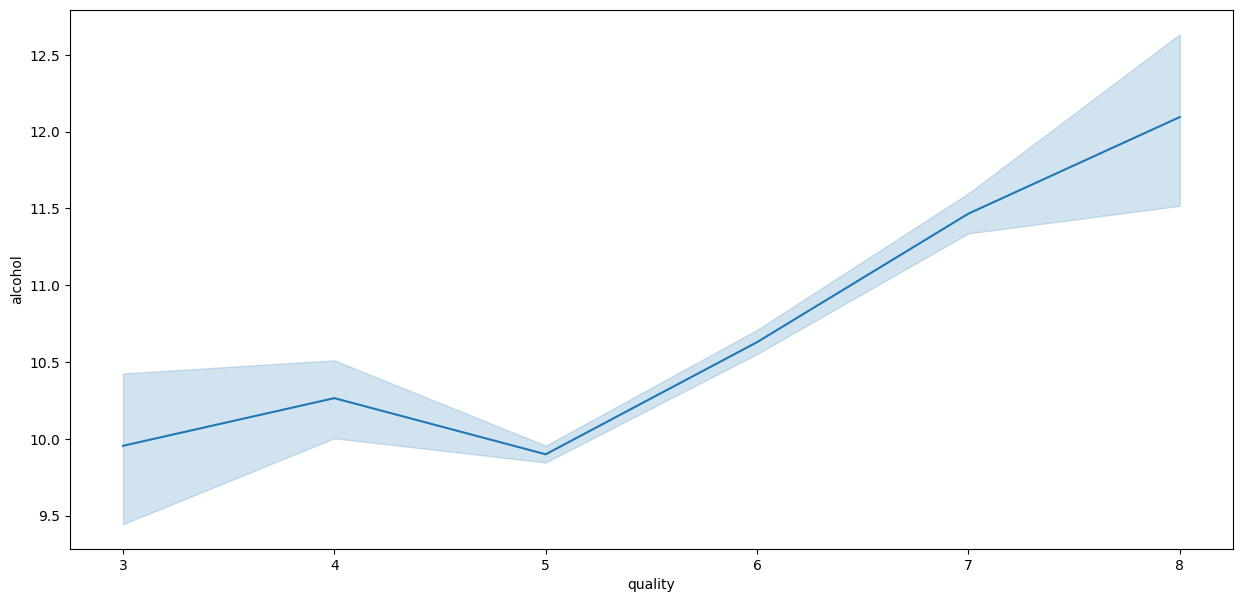

In [17]:
#Влияние алкоголя на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

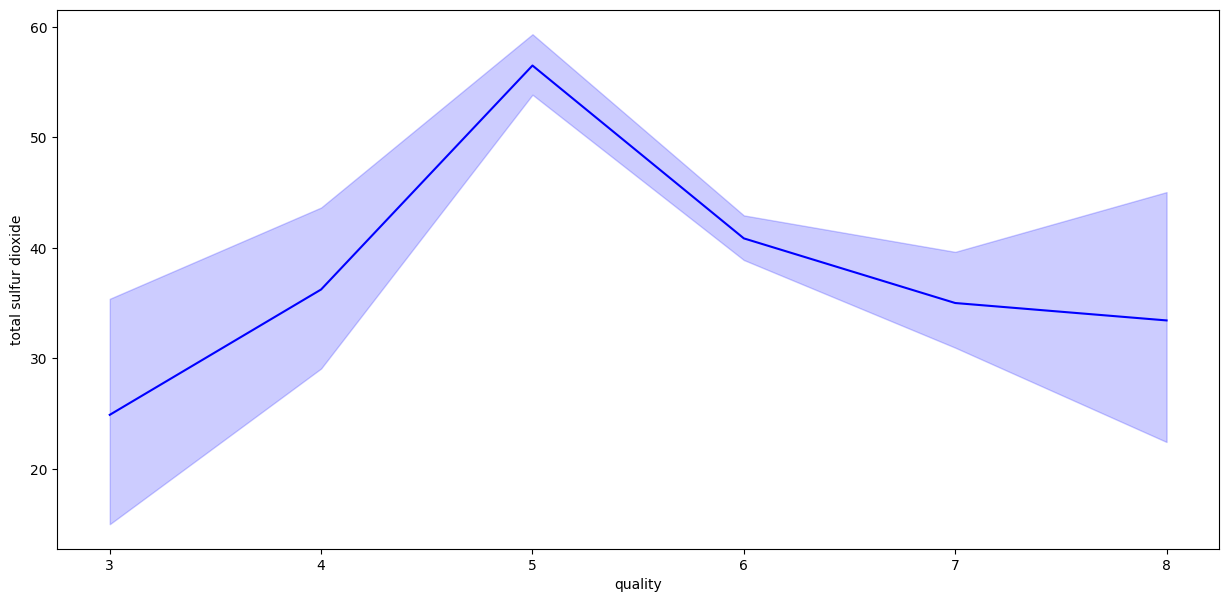

In [18]:
#Влияние диоксида серы на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

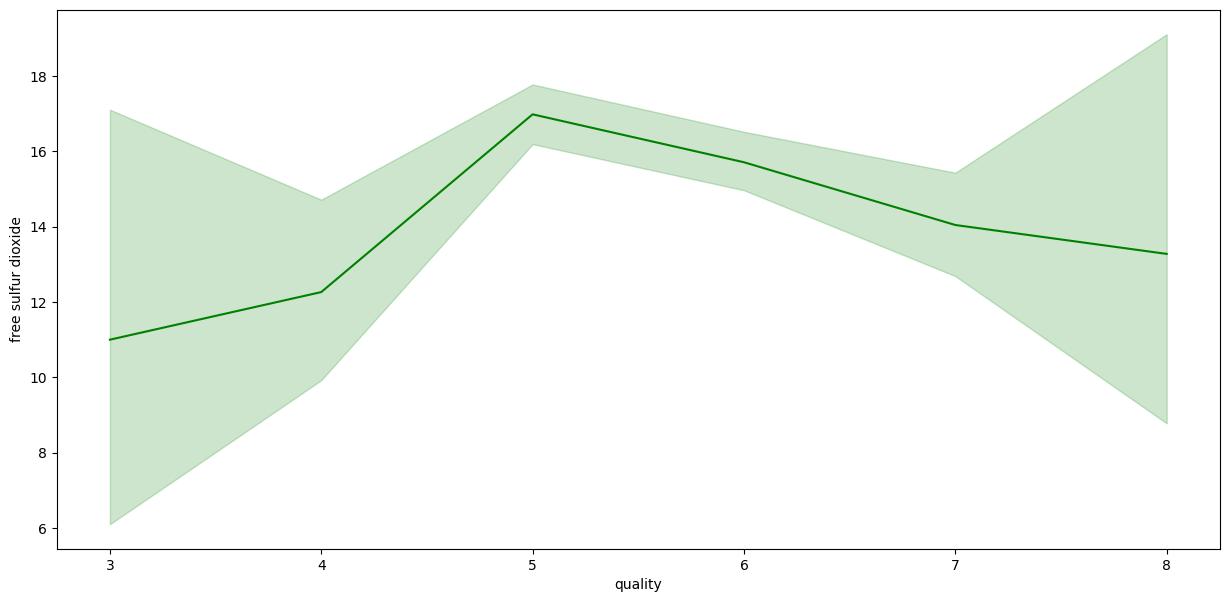

In [19]:
#Влияние свободного диоксида серы на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [20]:
#Опредедение значения x и значение y и разделение последовательности данных
x = df.drop(columns="quality")           
y = df["quality"]

In [21]:
#Разделение данных на train и test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("X Train : ", x_train.shape)
print("X Test  : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1199, 11)
X Test  :  (400, 11)
Y Train :  (1199,)
Y Test  :  (400,)


In [22]:
#Использование модели классификатора дерева решений
Tree_model=DecisionTreeClassifier(max_depth=10)

Tree_model.fit(x_train,y_train)

print("Score the X-train with Y-train is : ", Tree_model.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(x_test,y_test))

Score the X-train with Y-train is :  0.9065888240200167
Score the X-test  with Y-test  is :  0.6125


In [23]:
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.05109212 0.12594117 0.05248982 0.07936827 0.03848128 0.04005642
 0.11423454 0.06956993 0.06862574 0.12463188 0.23550882]


In [24]:
df.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [25]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(x_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.6125


In [26]:
#Используем модель SVC
svc_model=SVC(C=50,kernel="rbf")

svc_model.fit(x_train,y_train)

y_pred_svc =svc_model.predict(x_test)

print("Score the x-train with Y-train is : ", svc_model.score(x_train,y_train))
print("Score the x-test  with Y-test  is : ", svc_model.score(x_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the x-train with Y-train is :  0.5896580483736447
Score the x-test  with Y-test  is :  0.5575
 Model Evaluation Decision Tree : accuracy score  0.5575


In [27]:
#Используем модель SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

svr_model.fit(x_train,y_train)

y_pred_svr =svc_model.predict(x_test)

print("Score the x-train with Y-train is : ", svr_model.score(x_train,y_train))
print("Score the x-test  with Y-test  is : ", svr_model.score(x_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the x-train with Y-train is :  0.19729075780754435
Score the x-test  with Y-test  is :  0.17419765909470553
 Model Evaluation Decision Tree : accuracy score  0.5575


In [28]:
#Используем модель классификатора К ближайших соседей

K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(x_train, y_train)

y_pred_k = K_model.predict(x_test)

print("Score the X-train with Y-train is : ", K_model.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(x_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6705587989991659
Score the X-test  with Y-test  is :  0.4675
 Model Evaluation K Neighbors Classifier : accuracy score  0.4675


Результаты построения модели

Классификатор дерева решений
Оценка X-train с помощью Y-train равна: 90%
Оценка X-test с помощью Y-test составляет: 62%
Оценка точности 62%

Модель SVM
1- SVC
Оценка X-train с помощью Y-train равна: 58%
Оценка X-test с помощью Y-test равна: 55%
Оценка точности 55%

2-SVR
Оценка X-train с помощью Y-train равна: 14%
Оценка X-test с помощью Y-test равна: 23%
Оценка точности 64%

Модель соседей
Оценка X-train с помощью Y-train равна: 67%
Оценка X-test с помощью Y-test составляет: 47%
Оценка точности 47%